# Comparing Different Stream Environments
This Jupyter Notebook compares four streams in different environments in the U.S. 
Using hydrofunctions, we are able to plot the flow duration graphs for all four streams and compare them. 

In [1]:
import hydrofunctions as hf
%matplotlib inline

Choose four streams from different environments from HydroCloud. Import data for three years. 

In this example, all four streams are in places with low development:

- Colorado Western Slopes: ROARING FORK RIVER NEAR ASPEN, CO.
- California Mendicino National Park: MAD R AB RUTH RES NR FOREST GLEN CA
- White Mountains, NH: EAST BRANCH PEMIGEWASSET RIVER AT LINCOLN, NH
- PINTO CREEK NEAR MIAMI, AZ

In [2]:
streams = ['09073400','11480390','01074520','09498502']
sites = hf.NWIS(streams, 'dv', start_date='2001-01-01', end_date='2003-12-31')
sites

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=09073400%2C11480390%2C01074520%2C09498502&startDT=2001-01-01&endDT=2003-12-31


USGS:01074520: EAST BRANCH PEMIGEWASSET RIVER AT LINCOLN, NH
    00060: <Day>  Discharge, cubic feet per second
USGS:09073400: ROARING FORK RIVER NEAR ASPEN, CO.
    00060: <Day>  Discharge, cubic feet per second
USGS:09498502: PINTO CREEK NEAR MIAMI, AZ
    00060: <Day>  Discharge, cubic feet per second
USGS:11480390: MAD R AB RUTH RES NR FOREST GLEN CA
    00060: <Day>  Discharge, cubic feet per second
Start: 2001-01-01 00:00:00+00:00
End:   2003-12-31 00:00:00+00:00

In [3]:
#Create a dataframe of the four sites
Q = sites.df('discharge')
#Show the first few lines of the dataframe
Q.head()

,USGS:01074520:00060:00003,USGS:09073400:00060:00003,USGS:09498502:00060:00003,USGS:11480390:00060:00003
datetimeUTC,,,,
2001-01-01 00:00:00+00:00,160.0,22.0,2.7,21.0
2001-01-02 00:00:00+00:00,138.0,23.0,2.7,19.0
2001-01-03 00:00:00+00:00,132.0,21.0,2.7,16.0
2001-01-04 00:00:00+00:00,125.0,23.0,2.7,15.0
2001-01-05 00:00:00+00:00,130.0,24.0,2.7,13.0


In [4]:
# rename the columns based on the names of the sites from HydroCloud
Q.columns=['White Mountains National Park', 'White River National Forest', 'Tonto National Forest', 'Mendicino National Park']
# show the first few rows of the data to confirm the changes
Q.head()

,White Mountains National Park,White River National Forest,Tonto National Forest,Mendicino National Park
datetimeUTC,,,,
2001-01-01 00:00:00+00:00,160.0,22.0,2.7,21.0
2001-01-02 00:00:00+00:00,138.0,23.0,2.7,19.0
2001-01-03 00:00:00+00:00,132.0,21.0,2.7,16.0
2001-01-04 00:00:00+00:00,125.0,23.0,2.7,15.0
2001-01-05 00:00:00+00:00,130.0,24.0,2.7,13.0


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23235ac5860>)

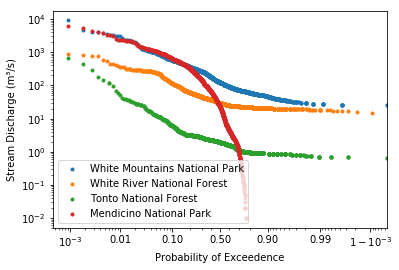

In [5]:
#use the built-in functions from hydrofunctions to create a flow duration graph for the dataframe.
hf.flow_duration(Q)

In [6]:
#Pull the stats for each of the four sites.
Q.describe()

,White Mountains National Park,White River National Forest,Tonto National Forest,Mendicino National Park
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,282.006941,57.492785,5.144813,221.987370
std,526.176775,81.064415,28.089932,514.204177
min,25.000000,14.000000,0.670000,0.000000
25%,66.300000,22.700000,1.000000,0.085000
50%,123.000000,29.000000,1.920000,22.500000
75%,305.500000,51.850000,3.000000,212.500000
max,9090.000000,916.000000,691.000000,6270.000000


## Analysis
Based on the flow duration chart and the descriptive statistics, the largest two sites are in Mendicino and the White Mountains of New Hampshire. However, if you look at the red line for the Mendicino site, it trails off and drops to zero between the 70% and 80% mark. It appears that this river had no water in it for approximately 22% of the days during these three years!

The other two sites at White River and in the Tonto National Forest seem to be same size at higher flows, but the Tonto site, in Arizona, tends to have lower low flows.